# Initial Thoughts
I wanted to start simply by using one API with extensive historical data-points. Specifically the open-meteo api which provides access to data all the way back to 1940. I collected daily data starting 01/01/1940, to present, 

### Needs follow-up
**and hosted a google cloud function to call the api daily, and update the data.**


# Linear Regression
Linear regression was my first choice for tackling this project. I had a good amount of data, of cyclical nature, and a good model to start with could be a linear regression on the sin/cos of the day of the year to predict the temperature.

Mean Absolute Error (MAE): 3.024014865471363
Root Mean Squared Error (RMSE): 3.964003762474862
explained_variance_score: 0.5585115074832561


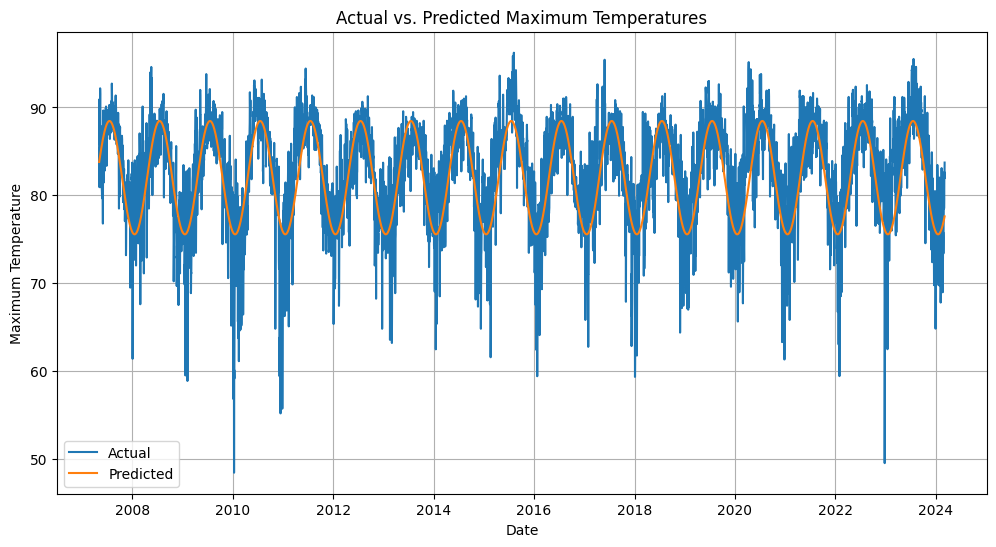

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split

weather_data = pd.read_csv('../data/miami_weather.csv')
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['day_of_year'] = weather_data['date'].dt.dayofyear

# Create sinusoidal features
weather_data['sin_day'] = np.sin(2 * np.pi * weather_data['day_of_year'] / 365)
weather_data['cos_day'] = np.cos(2 * np.pi * weather_data['day_of_year'] / 365)

# Create a new DataFrame with relevant features
data = weather_data[['date', 'day_of_year', 'sin_day', 'cos_day', 'temperature_2m_max']]

# Convert the data to numpy arrays
X = data[['sin_day','cos_day']].values
y = data['temperature_2m_max'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("explained_variance_score:", explained_variance_score(y_test, y_pred))

# Get the corresponding dates for the testing set
test_dates = data['date'].iloc[-len(X_test):]

# Plot the actual vs. predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, label='Actual')
plt.plot(test_dates, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Actual vs. Predicted Maximum Temperatures')
plt.legend()
plt.grid(True)
plt.show()

# Results
The model is great at picking up the cyclical nature of the temperature, but it is evidently not able to capture the full complexity of the fluctuations. One feature I am thinking of adding is the temperature of the previous day.

Mean Absolute Error (MAE): 2.042865425608096
Root Mean Squared Error (RMSE): 2.807340476486427
Explained Variance Score: 0.7684411864060018


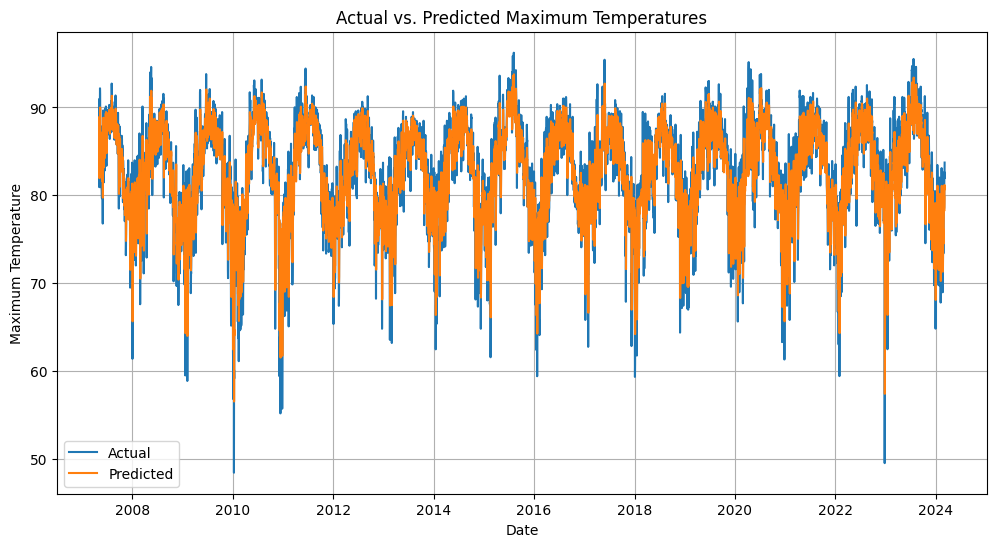

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split

weather_data = pd.read_csv('../data/miami_weather.csv')
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['day_of_year'] = weather_data['date'].dt.dayofyear

# Create sinusoidal features
weather_data['sin_day'] = np.sin(2 * np.pi * weather_data['day_of_year'] / 365)
weather_data['cos_day'] = np.cos(2 * np.pi * weather_data['day_of_year'] / 365)

# Create yesterday's maximum temperature feature
weather_data['yesterday_max_temp'] = weather_data['temperature_2m_max'].shift(1)

# Create a new DataFrame with relevant features
data = weather_data[['date', 'sin_day', 'cos_day', 'yesterday_max_temp', 'temperature_2m_max']]
data = data.dropna()  # Remove rows with missing values

# Convert the data to numpy arrays
X = data[['sin_day', 'cos_day', 'yesterday_max_temp']].values
y = data['temperature_2m_max'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Explained Variance Score:", explained_variance_score(y_test, y_pred))

# Get the corresponding dates for the testing set
test_dates = data['date'].iloc[-len(X_test):]

# Plot the actual vs. predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, label='Actual')
plt.plot(test_dates, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Actual vs. Predicted Maximum Temperatures')
plt.legend()
plt.grid(True)
plt.show()

# Results

The addition of previous day's temperature has improved the model significantly. Now it is better able to handle the fluctuations in temperature. My thoughts at this point are to add more features to the model. Possibly more climate data such as humidity, wind speed or precipitation.

# Updating the data_builder script

The data above was constructed using data_builder_v1. I will update the script to include more features from the open-meteo api.

![Example Image](../images/other/open_meteo_vars.JPG)

# Report updates

Now that I have much more data. I am going to start by including a few more, as well as add standarization, and see the new performance of the model.

Mean Absolute Error (MAE): 2.0586502991061795
Root Mean Squared Error (RMSE): 2.79467472824134
explained_variance_score: 0.7725770246974153


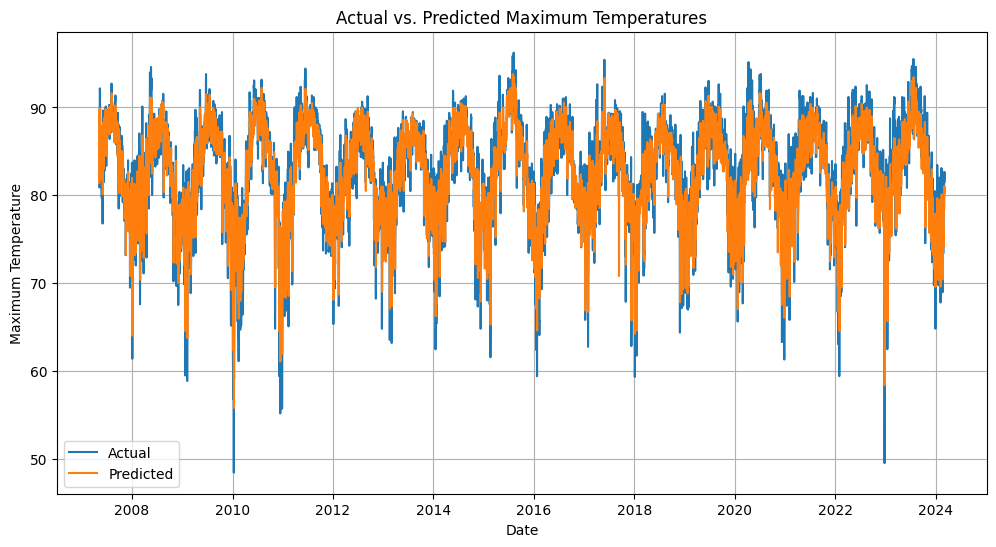

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

weather_data = pd.read_csv('../data/miami_weather_combined_daily.csv')
weather_data.head()

weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['day_of_year'] = weather_data['date'].dt.dayofyear

# Create sinusoidal features
weather_data['sin_day'] = np.sin(2 * np.pi * weather_data['day_of_year'] / 365)
weather_data['cos_day'] = np.cos(2 * np.pi * weather_data['day_of_year'] / 365)

# Add a feature for yesterday's data
weather_data['yesterday_max_temp'] = weather_data['temperature_2m_max'].shift(1)
weather_data['yesterday_min_temp'] = weather_data['temperature_2m_min'].shift(1)
weather_data['yesterday_wind_speed'] = weather_data['wind_speed_10m_max'].shift(1)
weather_data['wind_gusts_10m_max'] = weather_data['wind_gusts_10m_max'].shift(1)
weather_data['apparent_temperature_max'] = weather_data['apparent_temperature_max'].shift(1)

# Create a new DataFrame with relevant features
data = weather_data[['date', 'day_of_year', 'sin_day', 'cos_day', 'temperature_2m_max', 'yesterday_max_temp', 'yesterday_min_temp', 'yesterday_wind_speed','wind_gusts_10m_max', 'apparent_temperature_max']]
data = data.dropna()

# Convert the data to numpy arrays
X = data[['sin_day','cos_day', 'yesterday_max_temp', 'yesterday_min_temp', 'yesterday_wind_speed', 'wind_gusts_10m_max', 'apparent_temperature_max']].values
y = data['temperature_2m_max'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("explained_variance_score:", explained_variance_score(y_test, y_pred))

# Get the corresponding dates for the testing set
test_dates = data['date'].iloc[-len(X_test):]

# Plot the actual vs. predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, label='Actual')
plt.plot(test_dates, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Actual vs. Predicted Maximum Temperatures')
plt.legend()
plt.grid(True)
plt.show()

# Results

Not much of an improvement can be seen, even after adding a few more features. For now I am going to try different models, and see how they perform.

# New Data Sources

After some research, I found a reliable way to get the exact data that the Kalshi market uses. Providing aggregated daily data for the exact stations we are examining. This will be my primary source of data from now on.

## 1. NOAA Daily Aggregated Data (For sure - Daily model)
url: https://scacis.rcc-acis.org/

## 2. Open-Meteo Historical Data (For sure - Additional Features)
url: https://open-meteo.com/

## 3. Global Hourly - Integrated Surface Database (Hourly Data - Intraday Model)
url: https://www.ncei.noaa.gov/products/land-based-station/integrated-surface-database

## 4. 5-Minute Data (For sure - Decision Making throughout the day)
url: https://www.weather.gov/wrh/timeseries?site={insert_site symbol}

## 5. WeatherAPI, OpenWeather, MeteoStat (Additional Forecast)
url: https://openweathermap.org/api
url: https://www.weatherapi.com/
url: https://dev.meteostat.net/

# Codes for the stations
Chicago - KMDW, Elev: 617.0 ft; Lat: 41.78417, Lon: -87.75528

NYC - KNYC, Elev: 154.0 ft; Lat: 40.78333, Lon: -73.96667

Miami - KMIA, Elev: 10.0 ft; Lat: 25.79056, Lon: -80.31639

Austin - KAUS, Elev: 486.0 ft; Lat: 30.18304, Lon: -97.67987

# NOAA Daily Aggregated Data

I wrote a set of util functions under the organized folder, for each one of the data sources.

## update_noaa_data()

This function will create 4 csv files that contain all time aggregated climate data from NOAA.